[2018-02-02 12:34:48,209] Making new env: FrozenLake8x8-v0


For Generation 1 maximum : 0.52
For Generation 2 maximum : 0.64
For Generation 3 maximum : 0.57
For Generation 4 maximum : 0.7
For Generation 5 maximum : 0.64
For Generation 6 maximum : 0.77
For Generation 7 maximum : 0.88
For Generation 8 maximum : 0.92
For Generation 9 maximum : 0.91
For Generation 10 maximum : 0.91
For Generation 11 maximum : 0.95
For Generation 12 maximum : 0.95
For Generation 13 maximum : 0.93
For Generation 14 maximum : 0.93
For Generation 15 maximum : 0.94
For Generation 16 maximum : 0.96
For Generation 17 maximum : 0.94
For Generation 18 maximum : 0.93
For Generation 19 maximum : 0.94
For Generation 20 maximum : 0.93
For Generation 21 maximum : 0.94
For Generation 22 maximum : 0.93
For Generation 23 maximum : 0.94
For Generation 24 maximum : 0.94
For Generation 25 maximum : 0.94
For Generation 26 maximum : 0.94
For Generation 27 maximum : 0.92
For Generation 28 maximum : 0.95
For Generation 29 maximum : 0.96
For Generation 30 maximum : 0.95
For Generation 31 ma

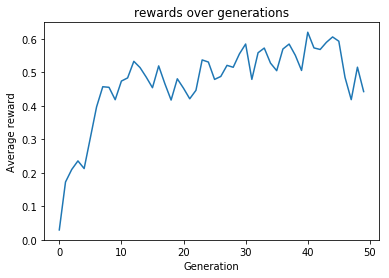

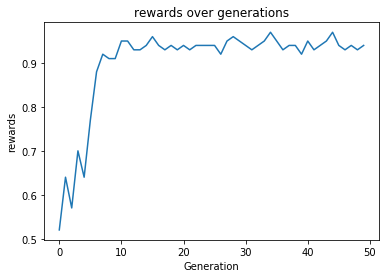

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym
import time

GAME = 'FrozenLake8x8-v0'
MAX_STEPS = 1000
env = gym.make(GAME)
in_dimen = env.observation_space.shape[0]
out_dimen = env.action_space.shape[0]
dim=[in_dimen, 16 , out_dimen]
N_GENERATION=70
N_pop =150
selection=10
mut_rate=0.0

class NN:
    def __init__(self,dim):
        self.fitness=0.0
        self.dict={}
        for i in range(len(dim)-1):
            self.dict["W"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i],dim[i+1]))
            self.dict["b"+str(i+1)]=np.random.uniform(low=-1,high=1,size=(dim[i+1]))

def sigmoid(z):
    s = 1./(1+np.exp(-z))
    return s
def propagate(NN,obs):    
    tmp=np.zeros(in_dimen)
    tmp[obs]=1       
    for i in range(len(dim)-1):
        z = np.dot(NN.dict["W"+str(i+1)].T,tmp)
        tmp = z+NN.dict["b"+str(i+1)]
        if i ==0 :
            tmp=np.maximum(0,tmp)
    tmp = sigmoid(tmp)
    return  np.argmax(tmp);
def crossover(NN1,NN2):
    NNN=NN(dim)    
    #loop over the weights
    for c in range(len(dim)-1):
        w1=NN1.dict["W"+str(c+1)]
        w2=NN1.dict["W"+str(c+1)]
        w=np.zeros_like(w1)
        for i in range (w1.shape[0]):
            for j in range (w1.shape [1]):
                if random.random() > 0.5 :
                    w[i][j]=w1[i][j]
                else:
                    w[i][j]=w2[i][j]
        NNN.dict["W"+str(c+1)]=w
        b1=NN1.dict["b"+str(c+1)]
        b2=NN2.dict["b"+str(c+1)]
        b = np.zeros_like(b1)
        for i in range(b1.shape[0]):
            if random.random() > 0.5:
                b[i]=b1[i]
            else:
                b[i]=b2[i]
        NNN.dict["b"+str(c+1)]=b
    return NNN

def mutation(NN,rate=0.01):
    
    for c in range(len(dim)-1):
        w=NN.dict["W"+str(c+1)]
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                if random.random() < rate:
                    NN.dict["W"+str(c+1)][i][j]=np.random.uniform(low=-1,high=1)
        b=NN.dict["b"+str(c+1)]
        for i in range(b.shape[0]):
            if random.random() < rate :
                NN.dict["b"+str(c+1)][i]=np.random.uniform(low=-1,high=1)
    return NN

def fitness(env,policy,n_episodes=100) :
    total_rewards = 0.0
    for i in range(n_episodes):
        total_rewards += run(env, policy)
    return total_rewards/n_episodes

def run(env, policy, episode_len=100):
    
    total_reward = 0
    obs = env.reset()
    for t in range(MAX_STEPS):
        #env.render()
        action = propagate(policy,obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward ;

best_NN=None
best_NN_fitness=-100000
visual=[]
population=[NN(dim) for _ in range(N_pop)]
avg=np.zeros(N_GENERATION)
best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
start=time.time()
for i in range(N_GENERATION):
    #vector as the size of N_POPS contains the score of each pop
    rewards=np.zeros(N_pop)
    #calculate the score of each pop
    for j in range(N_pop):
        rewards[j]=fitness(env,population[j])
    print('For Generation',i+1,'maximum :',max(rewards)) 
    #sort of the rewards in order to select the best pops
    best_scores=np.argsort(rewards)
    if i % 50 == 0 :
        visual.append(population[np.argmax(rewards)])
    #selection of best pops
    best[i] = max(rewards)
    
    if best[i]>best_NN_fitness:
        best_NN_fitness=best[i]
        best_NN=population[np.argmax(rewards)]
    avg[i] = np.mean(rewards)
    best_scores=best_scores[-selection:]
    best_pops=[]
    for c in range(selection):
        best_pops.append(population[best_scores[c]])
        #crossover the best ones randomly and ensure the same size of the pop
    new_pops=[]
    for j in range(N_pop):
        new_pops.append(crossover(best_pops[np.random.choice(len(best_scores))],best_pops[np.random.choice(len(best_scores))]))
            
    #Mutation over the newly born pops
    all=[]
    
    for c in range(N_pop):
        all.append (mutation(new_pops[c],mut_rate))
    population=new_pops
    

end=time.time()
print('Running time : ',(end-start))

plt.plot(avg)
plt.xlabel('Generation')
plt.ylabel('Average reward')
plt.title('rewards over generations')
plt.show()
plt.plot(best)
plt.xlabel('Generation')
plt.ylabel('rewards')
plt.title('rewards over generations')
plt.show()

        

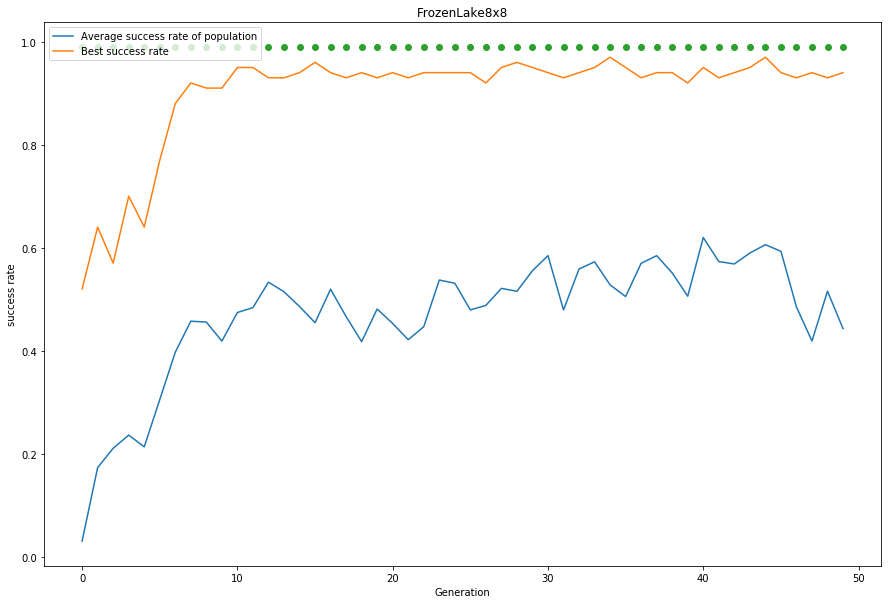

In [18]:
lim=np.zeros(50)+0.99
fig, ax = plt.subplots()
avg1 = avg[:50]
best1=best[:50]
l1, = ax.plot(avg1)
l2, = ax.plot(best1)
l3=ax.plot(lim,'o')

ax.legend((l1, l2), ('Average success rate of population', 'Best success rate'), loc='upper left', shadow=False)
ax.set_xlabel('Generation')
ax.set_ylabel('success rate')
ax.set_title('FrozenLake8x8')
plt.gcf().set_size_inches(15, 10)
plt.savefig('FrozenLake8x8_NN.png')
plt.show()

[2018-02-02 13:35:18,808] Making new env: FrozenLake8x8-v0


For Generation 1 maximum : 0.06
For Generation 2 maximum : 0.06
For Generation 3 maximum : 0.2
For Generation 4 maximum : 0.27
For Generation 5 maximum : 0.34
For Generation 6 maximum : 0.5
For Generation 7 maximum : 0.5
For Generation 8 maximum : 0.58
For Generation 9 maximum : 0.62
For Generation 10 maximum : 0.62
For Generation 11 maximum : 0.67
For Generation 12 maximum : 0.68
For Generation 13 maximum : 0.68
For Generation 14 maximum : 0.7
For Generation 15 maximum : 0.71
For Generation 16 maximum : 0.71
For Generation 17 maximum : 0.75
For Generation 18 maximum : 0.7
For Generation 19 maximum : 0.68
For Generation 20 maximum : 0.72
For Generation 21 maximum : 0.71
For Generation 22 maximum : 0.67
For Generation 23 maximum : 0.72
For Generation 24 maximum : 0.7
For Generation 25 maximum : 0.67
For Generation 26 maximum : 0.72
For Generation 27 maximum : 0.71
For Generation 28 maximum : 0.71
For Generation 29 maximum : 0.69
For Generation 30 maximum : 0.72
For Generation 31 maximum

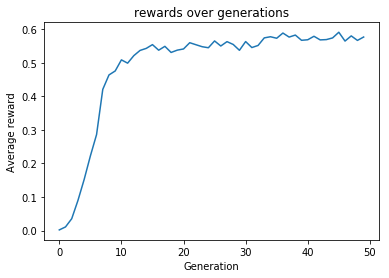

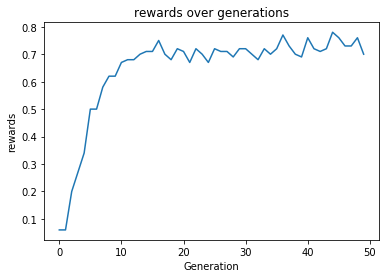

In [19]:
import numpy as np
import gym
import time
import matplotlib.pyplot as plt


N_GENERATION = 50
N_POPS = 100
selection=10
mut_rate=0.01
env = gym.make('FrozenLake8x8-v0')

#evaluate one pop over n_episodes
def run(env, policy, episode_len=100):
    total_reward = 0
    obs = env.reset()
    for t in range(episode_len):
        #env.render()
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

#FITNESS FUNCTION EVALUATE GIVEN POP THROUGH n-episodes according to the rewards
def fitness(env,policy,n_episodes=100) :
    total_rewards = 0.0
    for _ in range(n_episodes):
        total_rewards += run(env, policy)
    return total_rewards / n_episodes

#Randomly mutate a given pop and change some of it's values 
def mutation(env,policy,rate=mut_rate):
    prob=np.random.random_sample((64))
    for i in range(len(policy)):
        if prob[i]<rate:
            policy[i]=np.random.choice(4)
    return policy

#Given two parents pop1 and pop2 crossover return one pop(Child) where 
#its params are a random mix between the values of pop1 and pop2
def crossover(policy1,policy2):
    new=policy1.copy()
    prob=np.random.random_sample(64)
    for i in range(64):
        if prob[i]>0.5:
            new[i]=policy2[i]
        else: new[i]=policy1[i]
    return new



if __name__ == '__main__':
  
    start=time.time()
    #Generation of N_POPS random population with the size of 16 and values between 0 and 3 
    all_pop=np.random.randint(env.action_space.n, size=[N_POPS, env.observation_space.n])
    avg=np.zeros(N_GENERATION)
    best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
    for i in range(N_GENERATION):
        #vector as the size of N_POPS contains the score of each pop
        rewards=np.zeros(N_POPS)
        #calculate the score of each pop
        for j in range(N_POPS):
            rewards[j]=fitness(env,all_pop[j])
        print('For Generation',i+1,'maximum :',max(rewards)) 
        #sort of the rewards in order to select the best pops
        avg[i]=np.mean(rewards) 
        best[i] = max(rewards)
        best_scores=np.argsort(rewards)
        #selection of best pops        
        best_scores=best_scores[-selection:]
        best_pops=[all_pop[best_scores[c]] for c in range (len(best_scores))]
        #crossover the best ones randomly and ensure the same size of the pop
        new_pops=[crossover(best_pops[np.random.choice(len(best_scores))],
                            best_pops[np.random.choice(len(best_scores))]) for _ in range(N_POPS)]
        #Mutation over the newmly born pops
        all_pop=[mutation(env,pop) for pop in new_pops]
    end=time.time()
    print('Running time : ',(end-start))

    plt.plot(avg)
    plt.xlabel('Generation')
    plt.ylabel('Average reward')
    plt.title('rewards over generations')
    plt.show()
    plt.plot(best)
    plt.xlabel('Generation')
    plt.ylabel('rewards')
    plt.title('rewards over generations')
    plt.show()

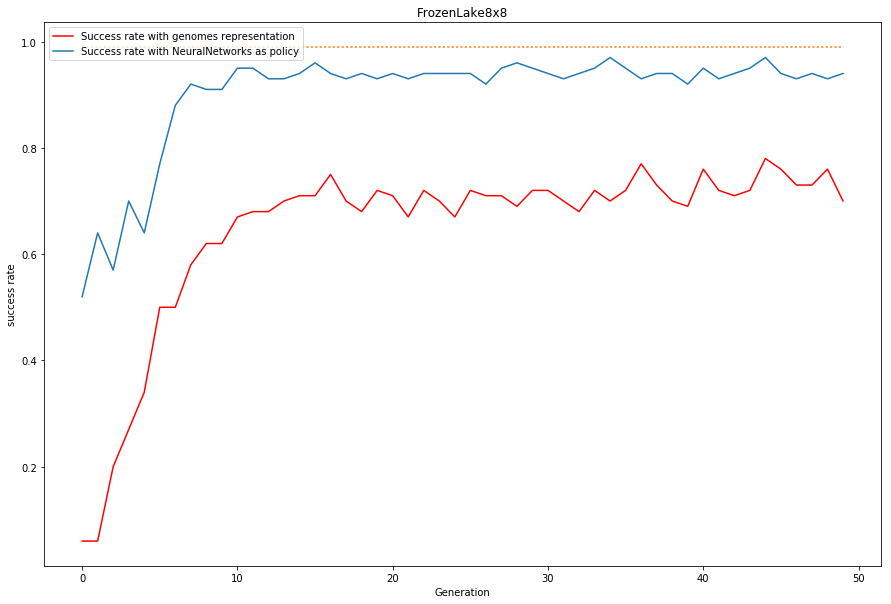

In [23]:
fig, ax = plt.subplots()
l1, = ax.plot(best,'r')
l2, = ax.plot(best1)
l3=ax.plot(lim,':')

ax.legend((l1, l2), ('Success rate with genomes representation', 'Success rate with NeuralNetworks as policy'), loc='upper left', shadow=False)
ax.set_xlabel('Generation')
ax.set_ylabel('success rate')
ax.set_title('FrozenLake8x8')
plt.gcf().set_size_inches(15, 10)
plt.savefig('FL8x8_NN_vs FL8x8_Basic.png')
plt.show()